In [1]:
import matplotlib.pyplot as plt

from drowsiness_detection.visualize import plot_learning_curve_from_keras_history
from joblib import load
from drowsiness_detection import config

In [11]:
history_paths = list(config.MODEL_DIR_PATH.joinpath("histories").iterdir())

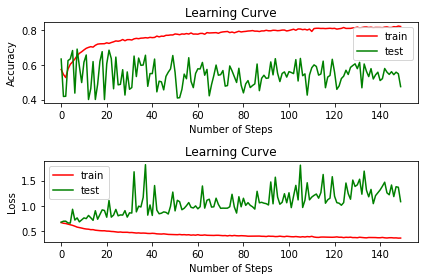

In [9]:
cnn_history = load(sorted([path for path in history_paths if "cnn" in str(path)])[-1])
plot_learning_curve_from_keras_history(history=cnn_history.history)


/home/tim/IM/data/models/60sec/histories/history_lstm_20220807-120122.joblib


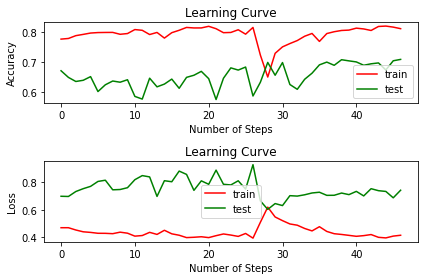

In [14]:
lstm_path = sorted([path for path in history_paths if "lstm" in str(path)])[-3]
lstm_history = load(lstm_path)
print(lstm_path)
plot_learning_curve_from_keras_history(history=lstm_history.history)


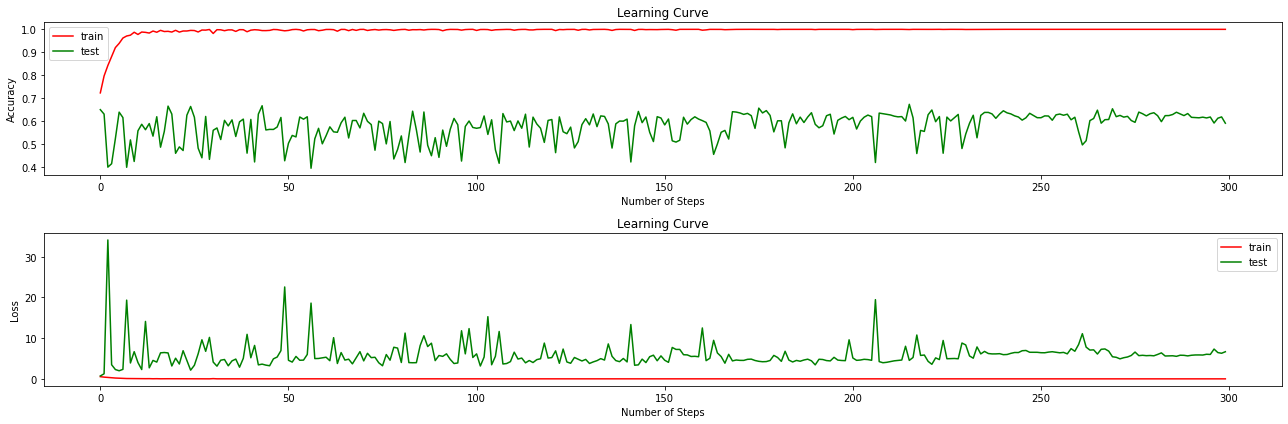

In [41]:
# resnet_history = load(sorted([path for path in history_paths if "resnet" in str(path)])[-1])
from csv import DictReader
with open('history.csv', newline='') as csvfile:
    train_loss, train_acc, test_loss, test_acc = [], [], [], []
    reader = DictReader(csvfile)
    for row in reader:
        train_loss.append(float(row["loss"]))
        train_acc.append(float(row["accuracy"]))
        test_loss.append(float(row["val_loss"]))
        test_acc.append(float(row["val_accuracy"]))
hist = dict(loss=train_loss, accuracy=train_acc, val_loss=test_loss, val_accuracy=test_acc)
from collections import namedtuple
history_tuple = namedtuple("history", "history")
resnet_history = history_tuple(hist)

plot_learning_curve_from_keras_history(history=resnet_history.history)

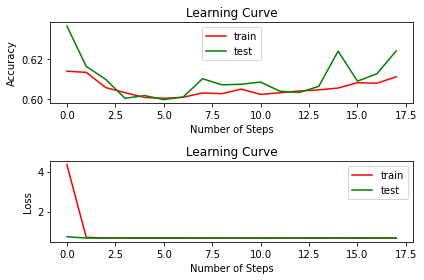

In [4]:
transformer_history = load(sorted([path for path in history_paths if "transformer" in str(path)])[-1])
transformer_history.history["accuracy"] = transformer_history.history["categorical_accuracy"]
transformer_history.history["val_accuracy"] = transformer_history.history["val_categorical_accuracy"]
del transformer_history.history["categorical_accuracy"]
del transformer_history.history["val_categorical_accuracy"]
plot_learning_curve_from_keras_history(history=transformer_history.history)


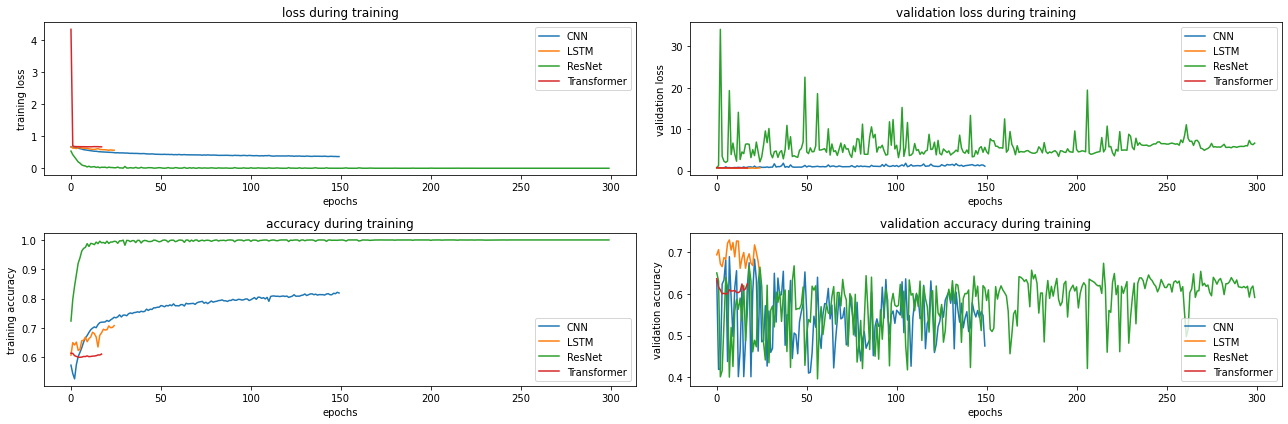

In [42]:
plt.rcParams["figure.figsize"] = 18,6
fig, all_axes = plt.subplots(2,2)
for metric, axes in zip(["loss", "accuracy"],all_axes) :

    for history, name in zip([cnn_history, lstm_history, resnet_history, transformer_history], ["CNN", "LSTM", "ResNet", "Transformer"]):
        train = history.history[metric]
        val = history.history["val_" + metric]

        axes[0].plot(train, label=name)
        axes[1].plot(val, label=name)

    axes[0].legend()
    axes[1].legend()
    axes[0].set_xlabel("epochs")
    axes[1].set_xlabel("epochs")
    axes[0].set_ylabel(f"training {metric}")
    axes[1].set_ylabel(f"validation {metric}")
    axes[0].set_title(f"{metric} during training")
    axes[1].set_title(f"validation {metric} during training")
    plt.tight_layout()

